# 국민청원데이터 NLP
　
 ### 2018. 11. 24. PASTEL HACKATHON

---------------------


### # 데이터 확인: Pandas

In [4]:
'''
source @https://github.com/akngs/petitions
'''
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

0.23.4
1.15.4


In [6]:
# KoNLPy Tag #
from konlpy.tag import Twitter
#from konlpy.tag import Kkma
#from konlpy.tag import Hannanum
#from konlpy.tag import Mecab #FAST! ONLY FOR mac/ubuntu users
twitter = Twitter()

In [7]:
petitions = pd.read_csv('petition_sampled.csv', index_col=0, parse_dates=True)
# index_col: row index 열 정의, parse_dates: 인덱스 열이나 복수 열의 날짜를 파싱할지 여부
# ㄴref: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

petitions.shape # 데이터 크기 확인

(16043, 7)

In [8]:
# [Column Description]
    # start: 청원시작일
    # end: 청원마감일
    # answered: 답변여부 (0/1)
    # votes: 청원동의 명수
    # category: 청원 카테고리(분야)
    # title: 청원 제목
    # content: 청원 내용

list(petitions.columns.values)

['start', 'end', 'answered', 'votes', 'category', 'title', 'content']

In [116]:
petitions.head(10)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...
149,2017-08-20,2017-11-18,0,0,일자리,중소기업 청년취업에 대하여 의견 하나 내겠습니다.,"문재인 대통령님.\n서론없이\n바로 본론부터 말하겠습니다,\n공정한 사회를 앞장서시..."
156,2017-08-21,2017-11-19,0,5,보건복지,"환자를 두 번 울리는, 시중 보험회사의 횡포",안녕하세요.\n저는 힘 없는 개인을 대상으로 마땅히 지급해야 할 보험금을 적게 지급...
165,2017-08-21,2017-09-05,0,428,보건복지,"농인(청각장애인) 수어통역지원서비스 지원체계를 위한 ""수어통역센터 중앙지원본부"" ...",존경하고 대통령님께 청원합니다.\n제4차 장애인정책종합계획은 각부처 합동으로 계획되...
193,2017-08-21,2017-09-20,0,2,행정,"8.2 부동산대책 실시후, 전세퇴거자금 대출 문제","수많은 임대인중 한사람으로써, 금번 부동산대책으로 인한 큰 피해를 보고 있는 선의의..."


In [117]:
# 청원답변 有
# e.g. "청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 청소년 보호법은 폐지해야합니다."
#      ㄴhttps://www1.president.go.kr/petitions/1785
petitions[petitions['answered'] == 1]

,start,end,answered,votes,category,title,content
article_id,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...
141333,2018-02-17,2018-03-19,1,208522,문화/예술/체육/언론,"연극인 이윤택씨의 상습 성폭행, 성폭력 피의사실에 대한 철저한 진상규명과 조사를 촉...",< 연극인 이윤택씨의 상습 성폭행 및 성폭력 피의사실 의혹에 대해 다음과 같은 청원...
148806,2018-02-23,2018-03-25,1,242687,인권/성평등,조두순 사건의 피해자 가족을 우롱하는 윤서인을 처벌해주십시오,'윤서인'이라는 만화가가 조두순 사건을 인용하여 정치상황을 풍자하는 만화를 그렸는데...


In [118]:
# 특정 열(columns)만 추출 
df = pd.read_csv('dataset/petition_sampled.csv', usecols=['category', 'content'])
df[:10]

,category,content
0,일자리,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,보건복지,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,육아/교육,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,기타,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,외교/통일/국방,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...
5,일자리,"문재인 대통령님.\n서론없이\n바로 본론부터 말하겠습니다,\n공정한 사회를 앞장서시..."
6,보건복지,안녕하세요.\n저는 힘 없는 개인을 대상으로 마땅히 지급해야 할 보험금을 적게 지급...
7,보건복지,존경하고 대통령님께 청원합니다.\n제4차 장애인정책종합계획은 각부처 합동으로 계획되...
8,행정,"수많은 임대인중 한사람으로써, 금번 부동산대책으로 인한 큰 피해를 보고 있는 선의의..."
9,교통/건축/국토,최근의 부동산시장 과열로 인한 정부의 대책들에 대해 일부 무리한 측면이 없는 것은 ...


　
### # Category to Content 딕셔너리 생성

In [119]:
import pprint

cat_to_cont = dict()
# ㄴE.g {'일자리': "안녕하세요? 존경하고 지지하는....", '보건복지': "안녕하십니까?\n저는 올해 63세된...",..}

for index, row in df.iterrows():
    category_nm = row['category']
    if category_nm not in cat_to_cont:
        cat_to_cont[category_nm] = row['content']
    else:
        cat_to_cont[category_nm] += row['content']

print("총 카테고리 목록: \n")
pprint.pprint(list(cat_to_cont.keys()))

총 카테고리 목록: 

['일자리',
 '보건복지',
 '육아/교육',
 '기타',
 '외교/통일/국방',
 '행정',
 '교통/건축/국토',
 '정치개혁',
 '안전/환경',
 '문화/예술/체육/언론',
 '경제민주화',
 '저출산/고령화대책',
 '농산어촌',
 '인권/성평등',
 '성장동력',
 '미래',
 '반려동물']


In [108]:
cat_to_cont['육아/교육'][:1000]

'저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등학교 선행학습을 학원다니며 치열하게 하고 있고 주위로부터 고등학교에 가면 국어가 어렵다느니 수학이 어렵다느니 과학이 어렵다느니 이런 말을 많이 듣고 있습니다. 실제로 제가 고등학교 선행학습을 하면 국어, 수학, 영어가 중학교에서 배우던 내용과 다르게 수준이 갑자기 올라가서 \' 아 정말 고등학교를 선행 안 하고 가면 성적이 안나오고 힘들다는 말이 그 말이구나\'하는 생각이 듭니다. 고등학교 교육 내용 수준을 낮춰주세요. 그리고 솔직히 말해서 고등학교에서 배우는 내용들은 정말 생활 속에서 잘 쓰이지 않는 것 같아 배울 때 체감도도 떨어지는 것 같습니다. 예를 들어 수학의 미적분 내용은 수학을 전문적으로 다루는 사람이 아니면 실생활에서 사용되지 않는 것 같습니다. 저는 실생활에서 정말 잘 쓰이고 꼭 알아야 될 것들을 배워야 한다고 생각합니다. 고등학교를 위해 제 주변에서도 수 많은 친구들이 선행학습 위해 학원을 다니느라 스트레스도 많이 받습니다. 고등학교 교육 내용을 바꾼다면 사교육도 줄어들지 않을까요기회는 평등하게, 과정은 공정하게, 결과는 정의롭게~!\\n대통령님 안녕하세요. 유치원임용고시생로 몇년째 집에 민폐주고 있는 수험생입니다.\\n정정당당하게 시험을 보고 합격하여 공립유치원 교사가 되어 아이들을 만나기 위해 오늘도 책상 앞에 앉아 있다 기사를 봤습니다.\\n연합뉴스 "기간제교사. 강사 정규직 전환9월초 판가름...가이드라인"이라는 제목과 함께 난 기사는\\n제가 왜 책상 앞에 앉아 있는지...눈물이 왈칵 나오려 합니다.\\n유치원 교사 올해는 TO많잖아~! 하실테죠?\\n네...지역 편차가 정말 심하게 많이 나게 수도권과 경기도 경남지역은 많이 뽑습니다.\\n하지만 저와는 상관없는 지역입니다.\\n지역을 옮겨서 시험보라고 하실테죠? 사는 지역 옮기는게 말처럼 쉬운일은 아니죠...\\n그냥 그래도 적게 뽑아도 내 실력으로 정정당당하게 시험보자 마음먹고 있던 참이였습니다.\

　
### # 형태소 분석: KoNLPy

In [120]:
from konlpy.tag import Twitter

twitter = Twitter()
#ONLY ONE CATEGORY (e.g.) '육아/교육'#
nouns = twitter.nouns(cat_to_cont['육아/교육'])
nouns = [n for n in nouns if len(n) > 1]
print(nouns[:100])

['광주', '학생', '고등학교', '가기', '직전', '학년', '고등학교', '선행', '학습', '학원', '위로', '고등학교', '가면', '국어', '수학', '과학', '실제', '고등학교', '선행', '학습', '국어', '수학', '영어', '중학교', '내용', '수준', '갑자기', '정말', '고등학교', '선행', '가면', '성적', '생각', '듭니', '고등학교', '교육', '내용', '수준', '고등학교', '내용', '정말', '생활', '체감', '도도', '수학', '미적분', '내용', '수학', '전문', '사람', '실생활', '사용', '실생활', '정말', '생각', '고등학교', '위해', '주변', '친구', '선행', '학습', '위해', '학원', '스트레스', '고등학교', '교육', '내용', '사교육', '기회', '과정', '결과', '정의롭', '대통령', '유치원', '임용고시', '생로', '민폐', '수험생', '시험', '보고', '합격', '공립', '유치원', '교사', '아이', '위해', '오늘', '책상', '기사', '연합뉴스', '기간', '교사', '강사', '정규직', '전환', '판가름', '가이드라인', '제목', '기사', '책상']


In [121]:
from collections import Counter

count = Counter(nouns)
tags = count.most_common(100)
    # ㄴ가장 많이 등장한 N개 구하기
print(tags)

[('아이', 1760), ('학생', 1201), ('생각', 954), ('학교', 899), ('교육', 828), ('교사', 748), ('어린이집', 541), ('사람', 495), ('대학', 408), ('선생님', 386), ('문제', 381), ('우리', 366), ('시간', 361), ('부모', 339), ('때문', 335), ('유치원', 312), ('위해', 310), ('공부', 310), ('사회', 300), ('제도', 290), ('정책', 287), ('지금', 281), ('엄마', 278), ('수능', 255), ('현재', 250), ('국민', 248), ('청원', 245), ('대통령', 244), ('시험', 243), ('대한', 241), ('보육', 239), ('저희', 238), ('청소년', 238), ('지원', 237), ('평가', 228), ('폐지', 227), ('수업', 226), ('이유', 223), ('정말', 219), ('나라', 218), ('학년', 214), ('대한민국', 210), ('정부', 210), ('현실', 209), ('또한', 208), ('고등학교', 205), ('상황', 201), ('경우', 200), ('국가', 189), ('가정', 188), ('초등학교', 188), ('전형', 184), ('학부모', 183), ('자신', 180), ('다른', 178), ('학원', 175), ('처벌', 175), ('마음', 174), ('영어', 173), ('우리나라', 173), ('이상', 171), ('제발', 170), ('자녀', 167), ('수시', 162), ('하나', 161), ('교육부', 161), ('대해', 161), ('모든', 159), ('사건', 159), ('정시', 158), ('운영', 150), ('정도', 149), ('입시', 149), ('사교육', 146), ('보고', 144), ('모두'

　
### # 데이터 시각화: Word Cloud

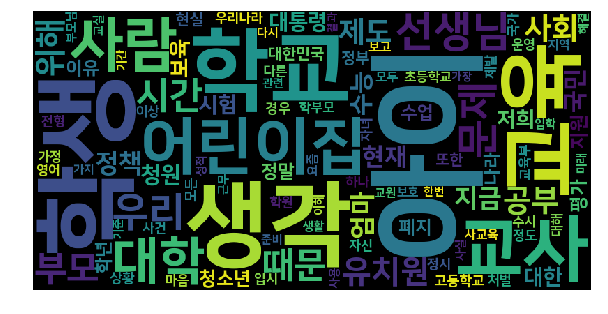

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = './2018-pastel-hackathon/font/NanumSquareEB.ttf'
wc = WordCloud(
                font_path=font_path, 
                background_color='black',
                width=800, height=400
              )
cloud = wc.generate_from_frequencies(dict(tags))
#print(dict(tags))
plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

-----------------------------------------------------------

In [ ]:
#----------자유롭게 분석해보세요.----------#

`@PASTEL HACKATHON`